In [116]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl

In [19]:
os.chdir("D:/Data_Science_ML_IITR_Sem_3")
df = pd.read_csv("D:/Data_Science_ML_IITR_Sem_3/IEA Global EV Data 2024.csv")
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [20]:
df.tail()

,region,category,parameter,mode,powertrain,year,unit,value
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55.0
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31.0
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000.0
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000.0
12653,World,Projection-STEPS,EV stock share,Trucks,EV,2035,percent,9.0


In [21]:
df.shape

(12654, 8)

In [22]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [24]:
numerical_column_names = df.select_dtypes(include=['number']).columns
print("Numerical Column Names:", numerical_column_names.tolist())

Numerical Column Names: ['year', 'value']


In [25]:
object_column_names = df.select_dtypes(include=['object']).columns
print("Object Column Names:", object_column_names.tolist())

Object Column Names: ['region', 'category', 'parameter', 'mode', 'powertrain', 'unit']


In [26]:
df.describe()

,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [27]:
duplicates=df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [28]:
invalid_year_rows = df[(df['year'] < 2010) | (df['year'] > 2035)]
if not invalid_year_rows.empty:
    print("Invalid values found in the 'year' column:")
    print(invalid_year_rows[['year']])

invalid_value_rows = df[(df['value'] < 0)]
if not invalid_value_rows.empty:
    print("Invalid values found in the 'value' column:")
    print(invalid_value_rows[['value']])

In [29]:
df.nunique()

region          54
category         3
parameter        8
mode             5
powertrain       6
year            17
unit             6
value         1032
dtype: int64

# Univariate Analysis

## Categorical Analysis

In [30]:
region_counts=df['region'].value_counts()
region_head = region_counts.head(15)
region_head

region
World                1250
Europe               1234
China                1138
Rest of the world     954
USA                   737
India                 702
EU27                  424
Netherlands           358
France                358
United Kingdom        345
Denmark               319
Belgium               310
Germany               298
Norway                270
Sweden                269
Name: count, dtype: int64

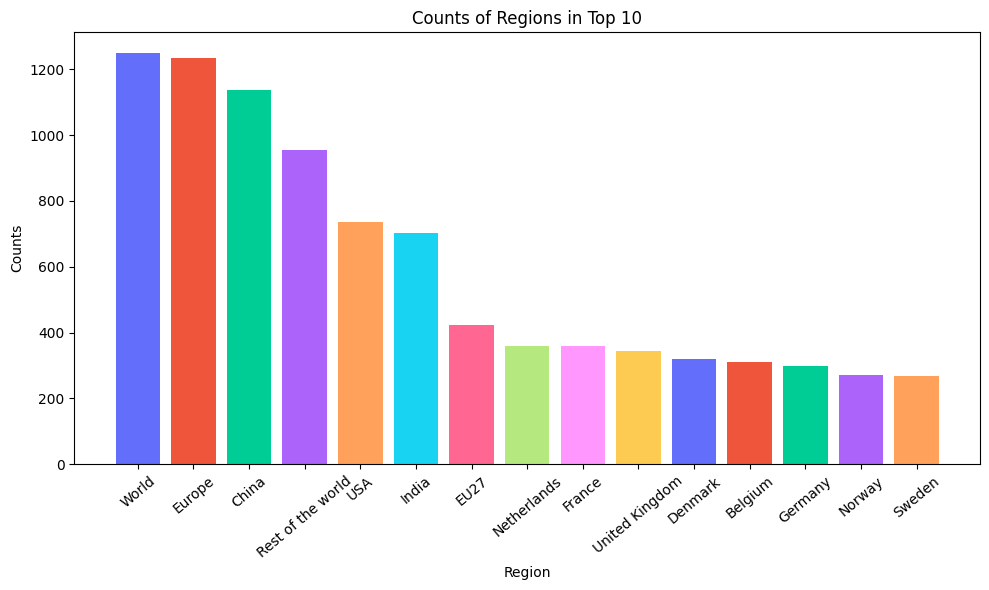

In [31]:
color_sequence = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
                  '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(region_head.index, region_head.values, color=color_sequence)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Counts')
plt.title('Counts of Regions in Top 10')
plt.xticks(rotation=40)

# Show the plot
plt.tight_layout()
plt.show()


In [32]:
category_counts = df['category'].value_counts()
category_counts

category
Historical          9174
Projection-APS      1742
Projection-STEPS    1738
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Categories')

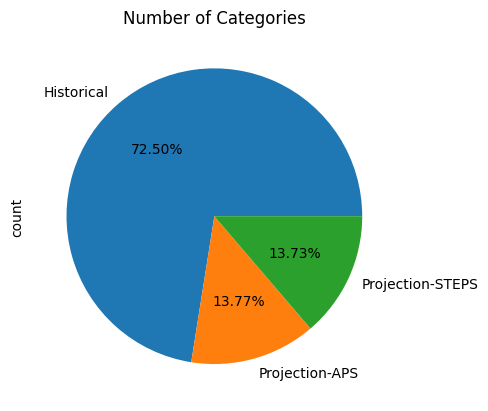

In [33]:
df['category'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Number of Categories')

In [34]:
mode_counts = df['mode'].value_counts()
mode_counts

mode
Cars      4706
Buses     2696
Vans      2568
Trucks    1766
EV         918
Name: count, dtype: int64

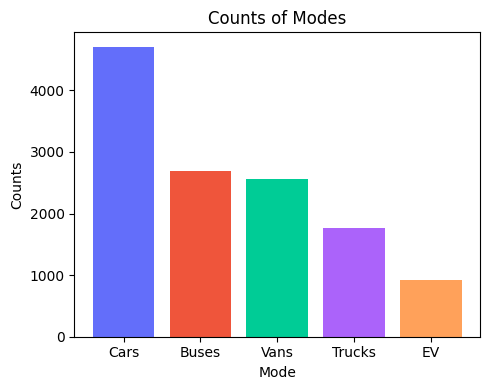

In [35]:
color_sequence = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
                  '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

# Creating a bar plot
plt.figure(figsize=(5, 4))
plt.bar(mode_counts.index, mode_counts.values, color=color_sequence)

# Add labels and title
plt.xlabel('Mode')
plt.ylabel('Counts')
plt.title('Counts of Modes')

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
parameter_counts = df['parameter'].value_counts()
parameter_counts

parameter
EV stock                         3470
EV sales                         3372
EV sales share                   1642
EV stock share                   1529
EV charging points                918
Oil displacement Mbd              586
Oil displacement, million lge     586
Electricity demand                551
Name: count, dtype: int64

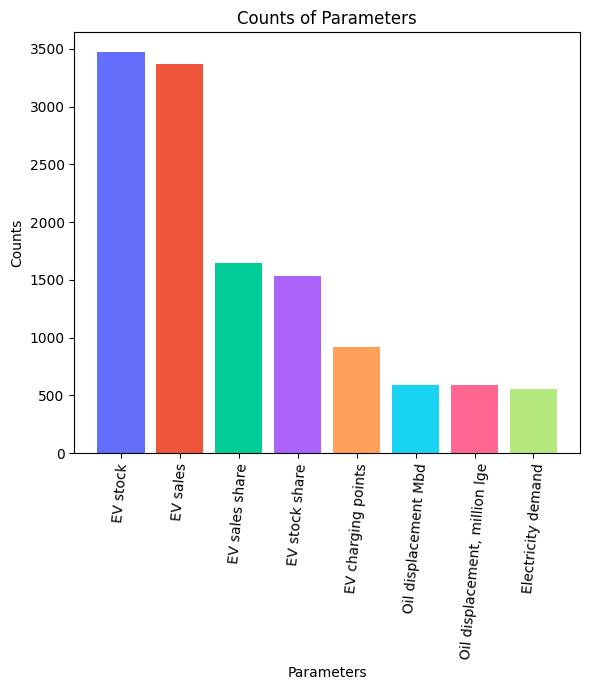

In [37]:
color_sequence = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
                  '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

# Creating a bar plot
plt.figure(figsize=(6, 7))
plt.bar(parameter_counts.index, parameter_counts.values, color=color_sequence)

# Add labels and title
plt.xlabel('Parameters')
plt.ylabel('Counts')
plt.title('Counts of Parameters')
plt.xticks(rotation=85)

# Show the plot
plt.tight_layout()
plt.show()

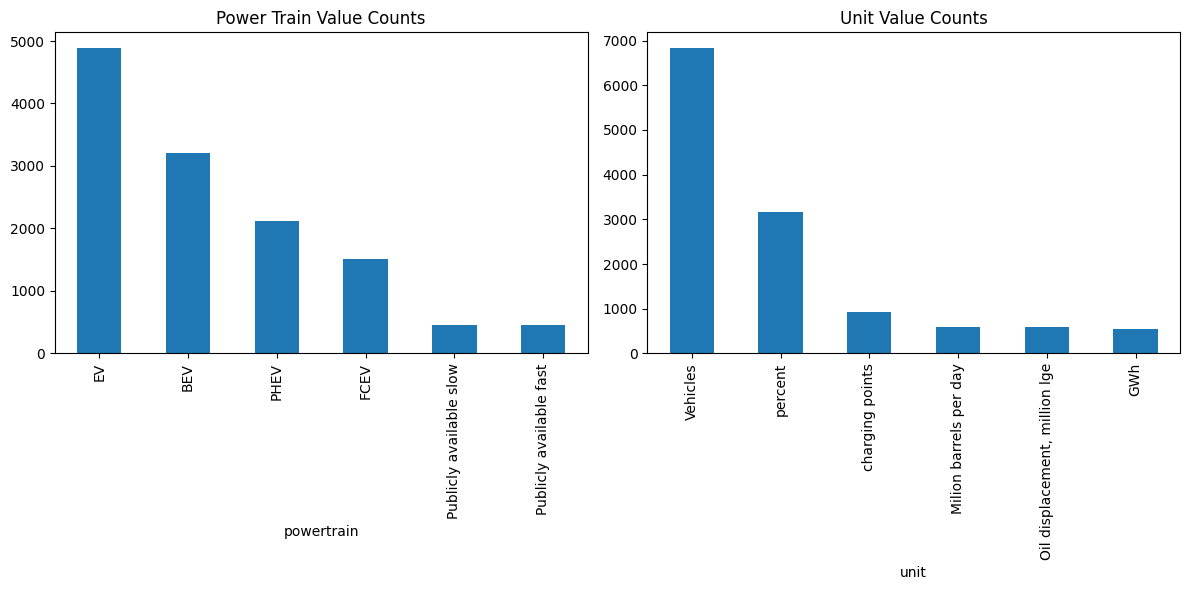

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot value counts for feature1
df['powertrain'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Power Train Value Counts')


# Plot value counts for feature2
df['unit'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Unit Value Counts')


plt.tight_layout()
plt.show()

## Numerical Analysis

In [39]:
logged_df = df

In [40]:
logged_df['value'] = np.log1p(logged_df['value'])

In [41]:
filtered_df = df[(df['parameter'] == 'EV stock share') & (df['unit'] == 'percent')]

# Extract the 'value' column from the filtered DataFrame
values = filtered_df['value']
print(values)

0        0.000390
7        0.002397
12       0.004589
19       0.013903
24       0.026642
           ...   
12643    2.484907
12646    3.044522
12648    2.944439
12650    3.465736
12653    2.302585
Name: value, Length: 1529, dtype: float64


#### Mean, Median, Min-Max, Range, Std Deviation

In [42]:
print("Mean of EV stock share percent value : ", round(values.mean(), 3))

Mean of EV stock share percent value :  0.578


In [43]:
print("Medain of EV stock share percent value : ", round(values.median(), 3))

Medain of EV stock share percent value :  0.207


In [44]:
print("Max value: ", round(values.max(), 3))
print("Min value: ", round(values.min(), 3))

Max value:  4.078
Min value:  0.0


In [45]:
print("Range of EV stock share percent value : ", round(values.max() - values.min(), 3))

Range of EV stock share percent value :  4.078


In [46]:
print("Standard Deviation of EV stock share percent value : ", round(values.std(), 3))

Standard Deviation of EV stock share percent value :  0.841


## Histogram and KDE plot

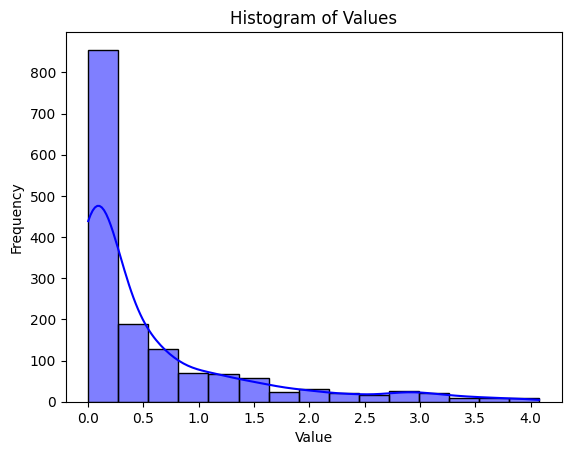

In [47]:
sns.histplot(values, kde=True, color='blue', bins=15)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

plt.show()

In [48]:
values.skew()

2.0043463049982813

#### Conclusion 1:

Shows that the Value Frequency curve is highly Right-Skewed, meaning majority "EV stock shares" have increased by very small percent, as even Mean and Median percent value of EV stock share are less than 1. Very less number of stock shares have increased by a large percentage.

In [91]:
year_count = df['year'].value_counts().reset_index()
year_count.columns = ['year', 'count']
year_count

,year,count
0,2023,1348
1,2021,1342
2,2022,1336
3,2020,1282
4,2019,797
5,2018,761
6,2017,720
7,2016,668
8,2015,621
9,2030,550


In [50]:
df["year"].mean()

2019.8221115852696

In [51]:
df['year'].median()

2020.0

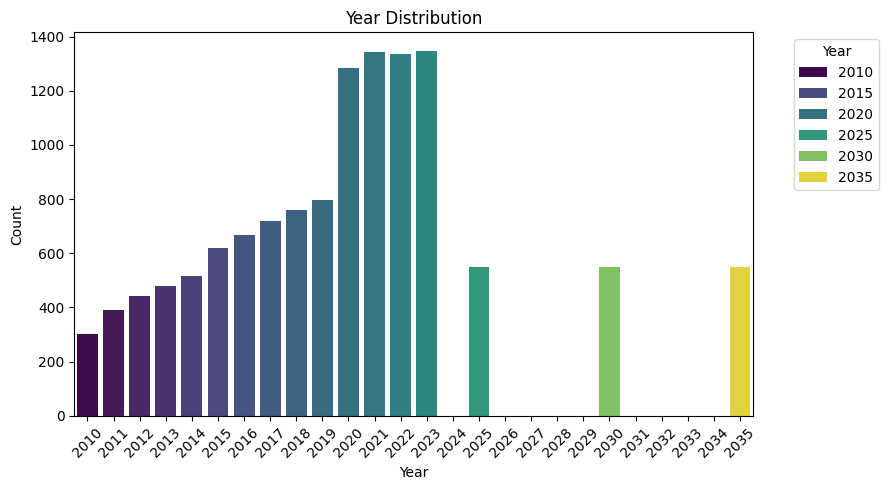

In [92]:
# For this example, make sure to have a continuous range of years, even if some have 0 counts
years_range = pd.Series(range(year_count['year'].min(), year_count['year'].max() + 1))
year_count = year_count.set_index('year').reindex(years_range, fill_value=0).reset_index()

# Create the bar plot with the 'hue' and adjusted bar width
plt.figure(figsize=(9, 5))

# Use hue for the color and reduce bar size (width)
sns.barplot(x='index', y='count', hue='index', data=year_count, dodge=False, width=0.8, palette='viridis')

# Set the title and axis labels
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')

# Adjust the legend to show the 'year' as hue
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure the x-axis has equal spacing for years (even those with 0 counts)
plt.xticks(ticks=range(len(year_count['index'])), labels=year_count['index'], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Box Plot of EV stock share percent values')

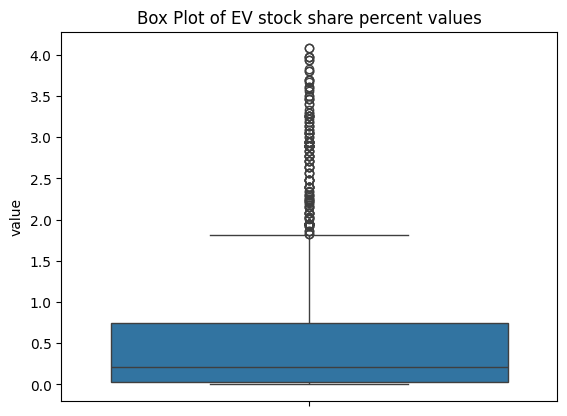

In [53]:
sns.boxplot(values)
plt.title('Box Plot of EV stock share percent values')

#### Z-score calculation and Outliers detection

In [54]:
# Check for outliers
# Option 1: Z-Score
z = np.abs(stats.zscore(df["year"]))
print(z)

# Option 2: Interquartile Range (IQR)
Q1 = df["year"].quantile(0.25)
Q3 = df["year"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(df[(df["year"] < lower) | (df["year"] > upper)])

# Handle outliers
# Option 1: Drop outliers
#df = df[(z < 3)]

# Option 2: Replace outliers with mean/median/mode
#df["year"][df["year"] < lower] = lower
#df["year"][df["year"] > upper] = upper


0        1.610969
1        1.610969
2        1.610969
3        1.610969
4        1.428363
           ...   
12649    2.771570
12650    2.771570
12651    2.771570
12652    2.771570
12653    2.771570
Name: year, Length: 12654, dtype: float64
      region          category           parameter    mode  \
2117   China    Projection-APS      EV sales share   Buses   
2118   China    Projection-APS      EV stock share   Buses   
2119   China    Projection-APS      EV stock share  Trucks   
2120   China  Projection-STEPS  Electricity demand   Buses   
2121   China  Projection-STEPS  Electricity demand  Trucks   
...      ...               ...                 ...     ...   
12649  World  Projection-STEPS      EV sales share    Cars   
12650  World  Projection-STEPS      EV stock share    Cars   
12651  World    Projection-APS  EV charging points      EV   
12652  World    Projection-APS  EV charging points      EV   
12653  World  Projection-STEPS      EV stock share  Trucks   

               

# Bivariate Analysis

## Categorical - Categorical

### Contingency Table and Heat-map

In [55]:
# categorical and categorical 
pd.crosstab(df['region'], df['mode'], margins=True, values=df['mode'], aggfunc=pd.Series.count) #cross tabulation to create a 
# contingency table ( count or numbers for 1 or more categories)

mode,Buses,Cars,EV,Trucks,Vans,All
region,,,,,,
Australia,NaN,82.0,12.0,NaN,NaN,94
Austria,NaN,90.0,26.0,NaN,NaN,116
Belgium,63.0,107.0,22.0,46.0,72.0,310
Brazil,40.0,73.0,12.0,24.0,34.0,183
Bulgaria,NaN,25.0,NaN,NaN,NaN,25
Canada,28.0,97.0,24.0,51.0,40.0,240
Chile,NaN,77.0,26.0,NaN,NaN,103
China,293.0,282.0,48.0,250.0,265.0,1138
Colombia,NaN,27.0,NaN,NaN,NaN,27


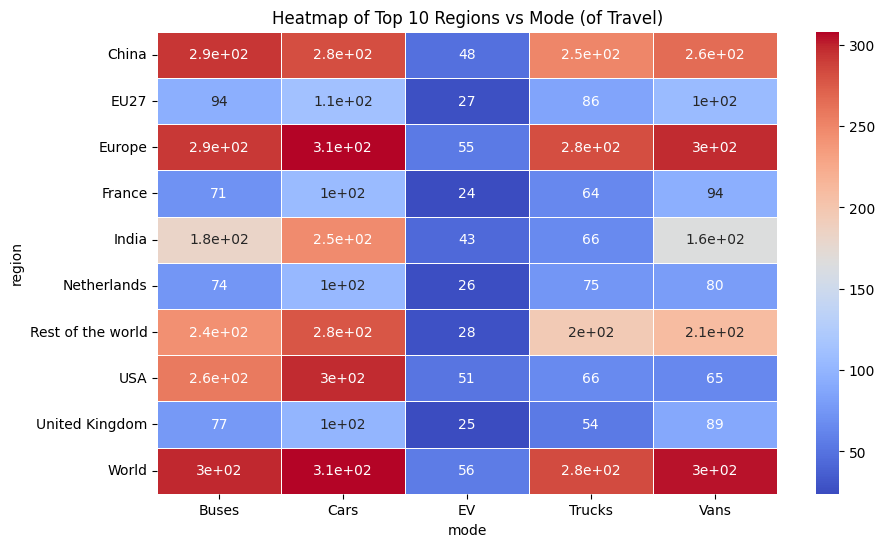

In [56]:
# Step 1: Get the top 10 countries (regions) based on value counts
top_10_regions = df['region'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame to include only the top 10 countries
filtered_df = df[df['region'].isin(top_10_regions)]

# Step 3: Create a pivot table for the heatmap (count of region vs mode)
pivot_table = filtered_df.pivot_table(index='region', columns='mode', aggfunc='size', fill_value=0)

# Step 4: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=.5)

# Add title
plt.title('Heatmap of Top 10 Regions vs Mode (of Travel)')

# Show the plot
plt.show()

#### In most of the regions, car and vans are the most used mode of transport, while EVs are the least used transport.

### Tchouproff Contingency Coefficient and Chi-Square Probability

In [57]:
tr=df.dropna(axis=0,how='any')
tr.describe()

,year,value
count,12654.000000,12654.000000
mean,2019.822112,5.337482
std,5.476494,4.343521
min,2010.000000,0.000001
25%,2016.000000,1.098612
50%,2020.000000,4.875197
75%,2022.000000,8.612685
max,2035.000000,19.902285


In [58]:
# Step 1: Create a contingency table between 'mode' and 'powertrain'
contingency_table = pd.crosstab(df['mode'], df['powertrain'])

# Step 2: Perform chi-squared test to get chi2 value
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
rounded_p = round(p, 5)

# Display the results
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Step 3: Calculate Tschuprow's T
n = contingency_table.sum().sum()  # Total number of observations
r, c = contingency_table.shape  # Number of rows and columns

tschuprow_t = np.sqrt(chi2 / (n * np.sqrt((r - 1) * (c - 1))))

# Display the result
print(f"Tschuprow's T between 'mode' and 'powertrain': {tschuprow_t:.3f}")

Chi-squared Statistic: 12847.481005546808
P-value: 0.0
Degrees of Freedom: 20
Tschuprow's T between 'mode' and 'powertrain': 0.476


0 p-value shows complete dependency between mode and powertrain used.

<Axes: xlabel='powertrain', ylabel='mode'>

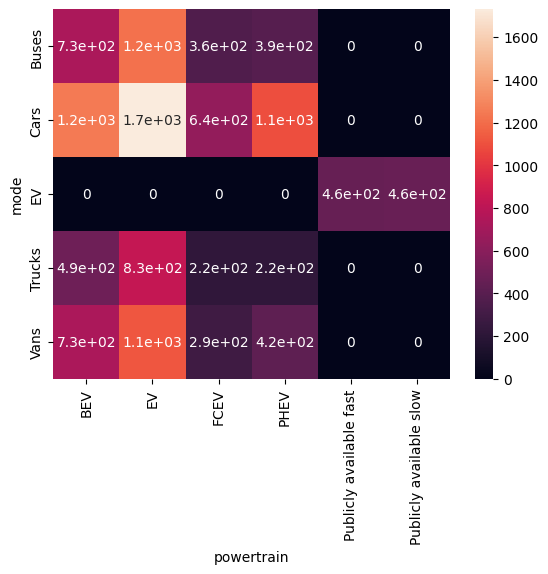

In [59]:
sns.heatmap(contingency_table, annot=True)

### Stacked Column Chart

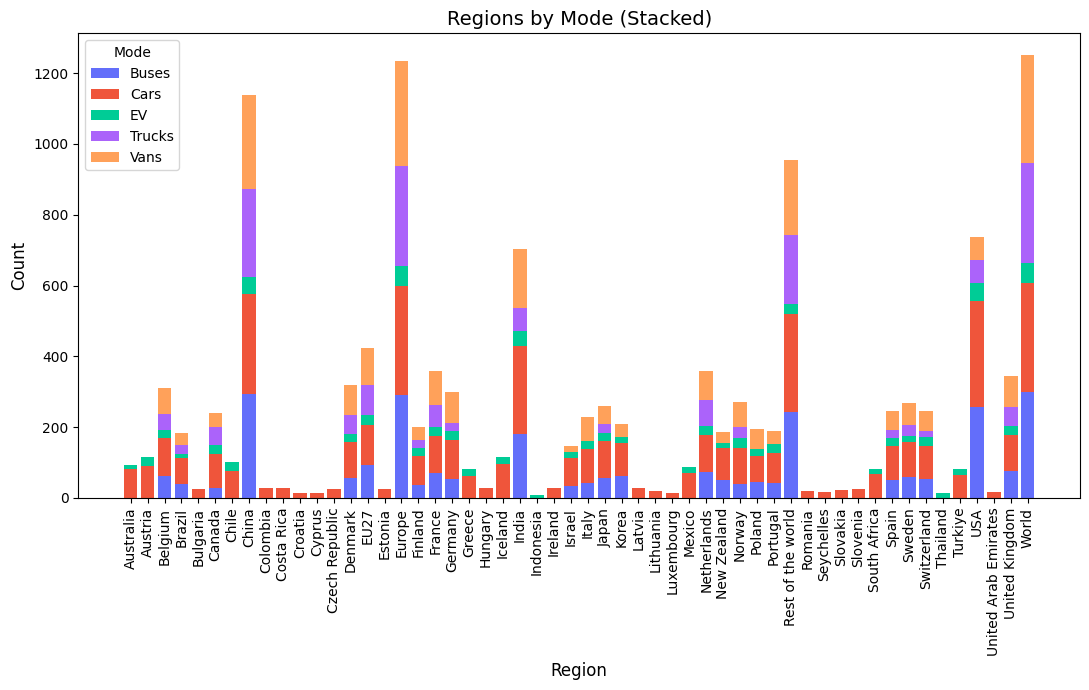

In [101]:
region_category_counts = df.groupby(['region', 'mode']).size().reset_index(name='count')

# Pivot the data to get modes as columns for stacked bar plotting
stacked_data = region_category_counts.pivot(index='region', columns='mode', values='count').fillna(0)

# Create the stacked bar chart
plt.figure(figsize=(11, 7))

# Define a set of normal colors for different modes
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
                  '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']


# Plot the stacked bars
bottom = None  # Initial value for bottom parameter
for i, mode in enumerate(stacked_data.columns):
    plt.bar(stacked_data.index, stacked_data[mode], bottom=bottom, label=mode, color=colors[i % len(colors)])
    if bottom is None:
        bottom = stacked_data[mode]
    else:
        bottom += stacked_data[mode]

# Set the title and labels
plt.title('Regions by Mode (Stacked)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)

# Add a legend to label the different modes
plt.legend(title='Mode')

# Display the plot
plt.tight_layout()
plt.show()

## Numerical - Numerical

### Scatter Plot

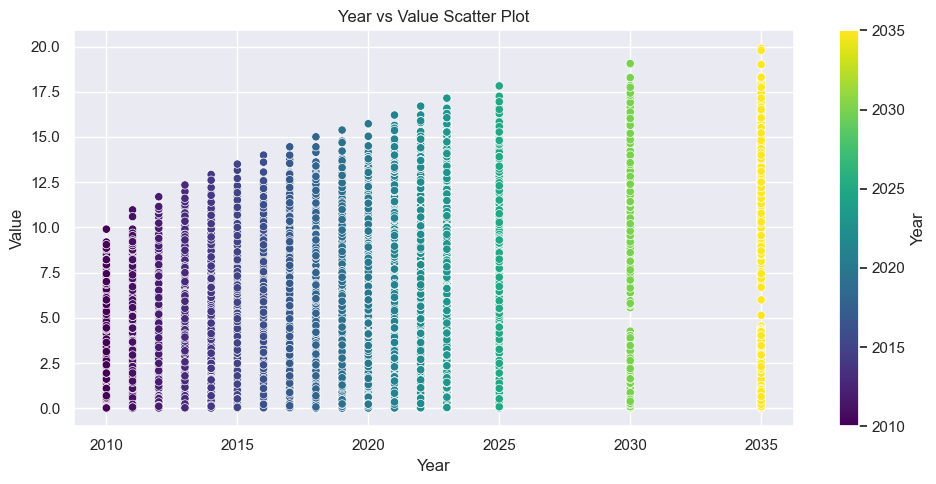

In [129]:
# Set Seaborn style
sns.set()

plt.figure(figsize= (10, 5))

# Create the scatter plot
ax = sns.scatterplot(x="year", y="value", hue="year",
                     palette='viridis', data=df)

# Create a normalization object for the color mapping
norm = plt.Normalize(df['year'].min(), df['year'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Necessary for ScalarMappable to function

# Remove the legend and add a colorbar using the axes of the scatter plot
ax.get_legend().remove()
cbar = plt.colorbar(sm, ax=ax)  # Specify the axes for the colorbar
cbar.set_label('Year')  # Optionally label the colorbar

# Show the plot
plt.title('Year vs Value Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Value')
plt.tight_layout()  # Adjust layout
plt.show()

### Correlation Coefficient

In [62]:
# Linear - Numerical and Numerical
x = df['year'].to_numpy()
y = df['value'].to_numpy()
np.corrcoef(x, y)

array([[1.        , 0.37053796],
       [0.37053796, 1.        ]])

There is Low Positive Corelation (value increased as year passed by, but not regularly/perfectly) between Year in which EVs were sold and how much its share values rose.

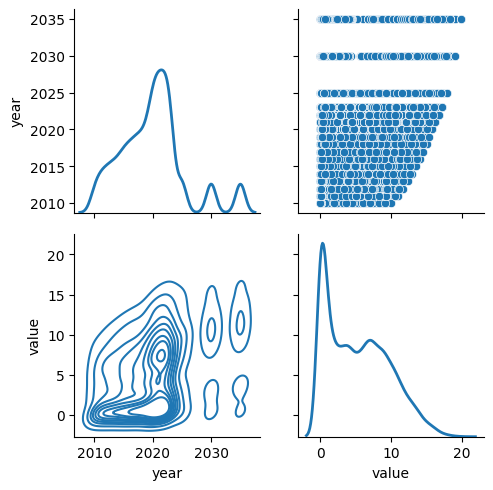

In [63]:
# numerical and numerical 
g = sns.PairGrid(df)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, colors="C0")
g = g.map_diag(sns.kdeplot, lw=2)

## Categorical-Numerical

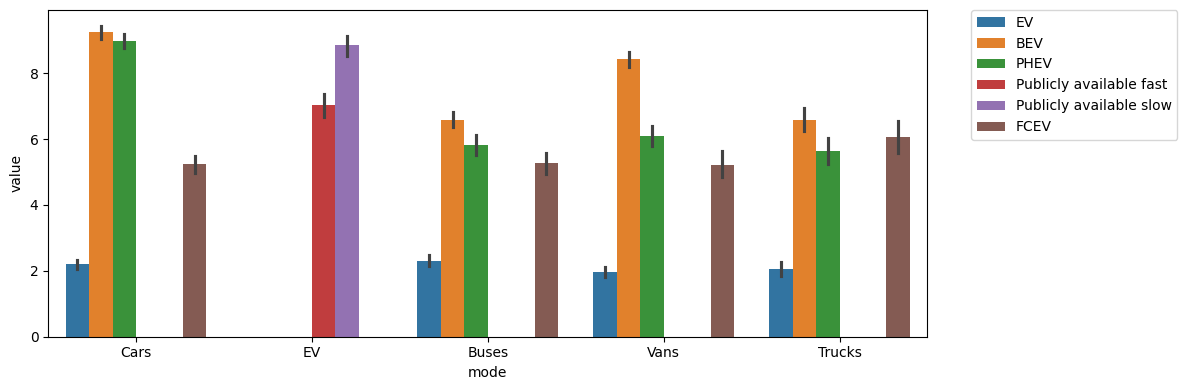

In [64]:
plt.figure(figsize=(12, 4))
sns.barplot(x='mode', y='value', hue='powertrain', data=df)  # hue adds the legend

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.tight_layout()
plt.show()

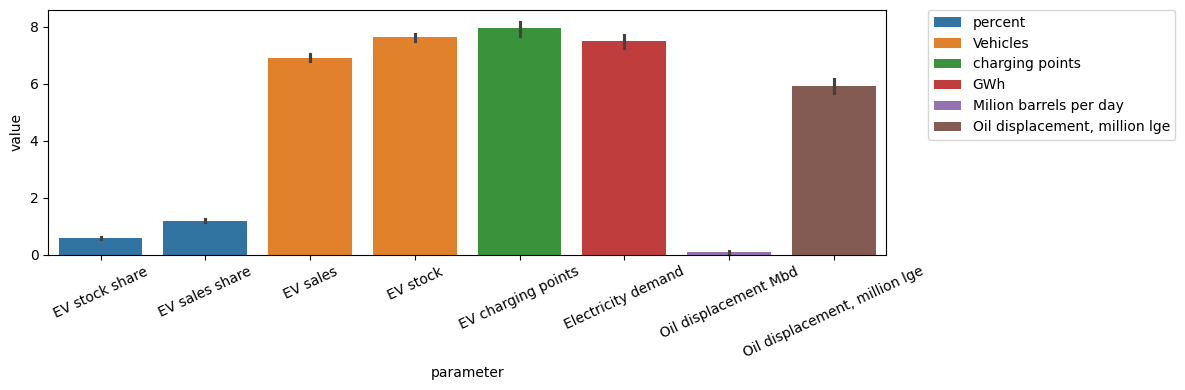

In [65]:
plt.figure(figsize=(12, 4))
sns.barplot(x='parameter', y='value', hue='unit', data=df)  # hue adds the legend

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=25)

# Show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='mode', ylabel='value'>

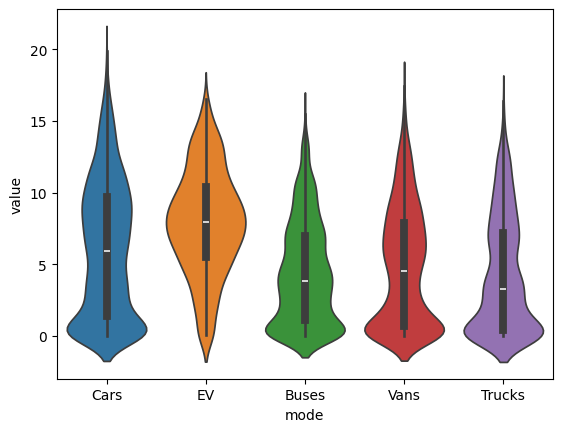

In [66]:
sns.violinplot(x='mode',y='value',data=df,hue='mode', dodge = False)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'EV'),
  Text(1, 0, 'BEV'),
  Text(2, 0, 'PHEV'),
  Text(3, 0, 'Publicly available fast'),
  Text(4, 0, 'Publicly available slow'),
  Text(5, 0, 'FCEV')])

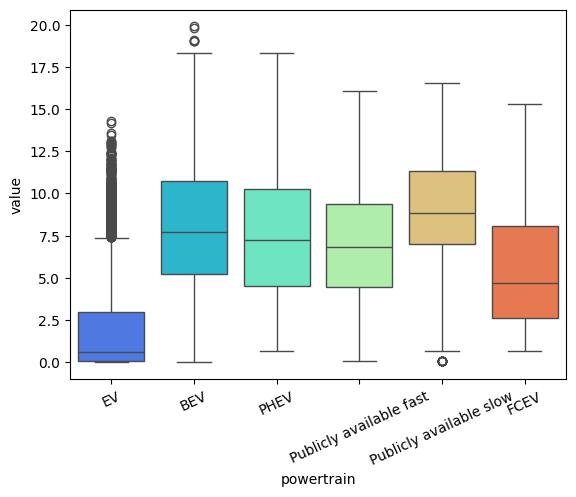

In [67]:
sns.boxplot(x='powertrain', y='value', hue='powertrain', data=df, palette='rainbow', dodge=False)
plt.xticks(rotation=25)

We see that EV, FCEV, Publicly available fast types of powertrains are still not being sold rapidly, as their sales values remain at a lower count and percentage.

In [68]:
tr=df.dropna(axis=0,how='any')
tr.describe()

,year,value
count,12654.000000,12654.000000
mean,2019.822112,5.337482
std,5.476494,4.343521
min,2010.000000,0.000001
25%,2016.000000,1.098612
50%,2020.000000,4.875197
75%,2022.000000,8.612685
max,2035.000000,19.902285


In [69]:
df['mode'].unique()

array(['Cars', 'EV', 'Buses', 'Vans', 'Trucks'], dtype=object)

### T-test between a numerical and a categorical variable

In [70]:
a = tr.loc[tr['mode'] == 'Cars', 'value'].to_numpy()
b = tr.loc[tr['mode'] == 'EV', 'value'].to_numpy()
stats.ttest_ind(a=a, b=b, equal_var=True)

TtestResult(statistic=-11.476088744697673, pvalue=3.7611922027732214e-30, df=5622.0)

### Annova Test between multiple categorical and a numerical variable

In [102]:
# ANOVA - Categorical and Numerical between different modes of transports
a = tr.loc[tr['mode'] == 'Cars', 'value'].to_numpy()
b = tr.loc[tr['mode'] == 'EV', 'value'].to_numpy()
c = tr.loc[tr['mode'] == 'Buses', 'value'].to_numpy()
d = tr.loc[tr['mode'] == 'Vans', 'value'].to_numpy()
b = tr.loc[tr['mode'] == 'Trucks', 'value'].to_numpy()
fvalue, pvalue = stats.f_oneway(a,b,c)
print("F value :", fvalue)
print("P value : ", pvalue)

F value : 184.70510658125798
P value :  2.2806019697979553e-79


#### Conclusion of Annova and T-test

Highly low P value in annova and t-test shows that there is a Significant difference in avergaes of stock shares values of All different modes of transports sold.

### Conclusion Summary

1) Complete dependency between mode and powertrain used, that is certain mode of transport has certain type of powertrain installed in it. Thus sales of mode of transport directly impacts sales of respective type of powertrain.
2) The Value Frequency curve is highly Right-Skewed, meaning majority "EV stock shares" have increased by very small percent, as even Mean and Median percent value of EV stock share are less than 1. Very less number of stock shares have increased by a large percentage. That is, a large amount of effort and awareness/publicity is required.
3) There is Low Positive Corelation (value increased as year passed by, but not regularly/perfectly) between Year in which EVs were sold and how much its share values rose.
4) Highly low P value in annova and t-test shows that there is a Significant difference in avergaes of stock shares values of All different modes of transports sold.
5) We see that EV, FCEV, Publicly available fast types of powertrains are still not being sold rapidly, as their sales values remain at a lower count and percentage. While their usage is advantageous. So still there is a potential market in EVs, that has to be developed in almost all regions of the world.
6) In most of the regions, car and vans are the most used mode of transport, while EVs are the most used transport. Thus there is large market for cars, vans, public transport like buses everywhere, while EVs have potential and has to be developed.
